# The story of the dataset 
# scatter plots

### veri seti hikayesi
###### price: dolar cinsinde fiyat (326-18,823)
###### carat = ağırlık (0.2-5.01)
###### kalite(Fair, Good, Very Good, Premium, Ideal)
###### renk(from J (Worst) to D (Best))
###### temizliği, berraklığı (I1 (Worst), SI2, VS2, VS1, VVS2, VVS1, IF (Best))
###### x : lenght in mm(0,10.74)
###### y : width in mm(0-58.9)
###### z : depth in mm(0-31.8)
###### depth : toplam derinlik yüzdesi = z / mean(x,y) = 2 * z / (x+y)(43-79)
###### table : elmasın en geniş noktasına göre genişliği



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# first a quick look at the dataset 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [6]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [4]:
# ordinal
from pandas.api.types import CategoricalDtype

In [10]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [12]:
df.cut = df.cut.astype(CategoricalDtype(ordered=True))

In [13]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [14]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [5]:
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [6]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories,ordered=True))

In [7]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [8]:
# barplot

<AxesSubplot:>

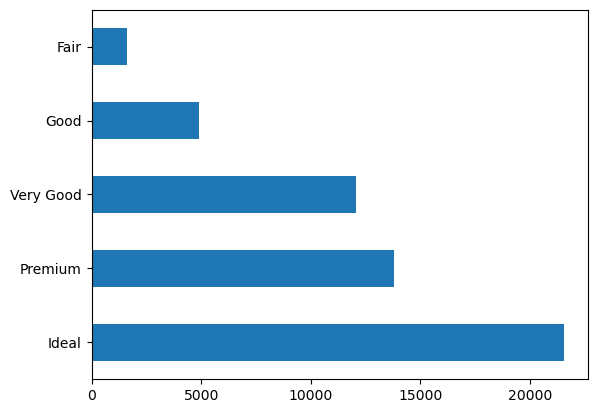

In [9]:
df["cut"].value_counts().plot.barh()

Text(0.5, 1.0, 'Class frequencies of the Cut variable')

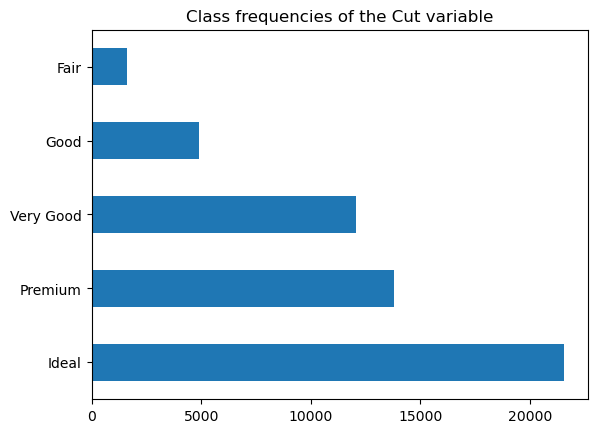

In [10]:
df["cut"].value_counts().plot.barh().set_title("Class frequencies of the Cut variable")

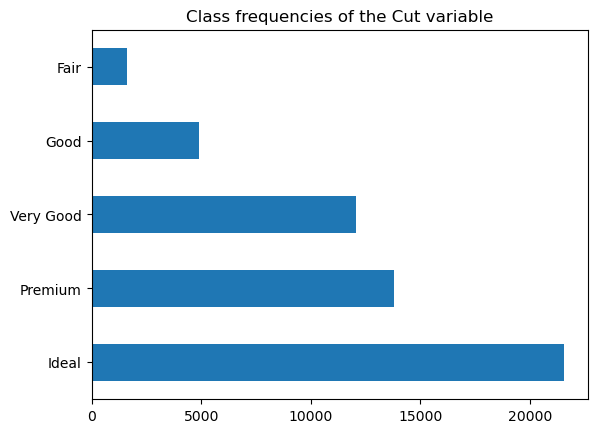

In [11]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Class frequencies of the Cut variable"));

<AxesSubplot:xlabel='cut'>

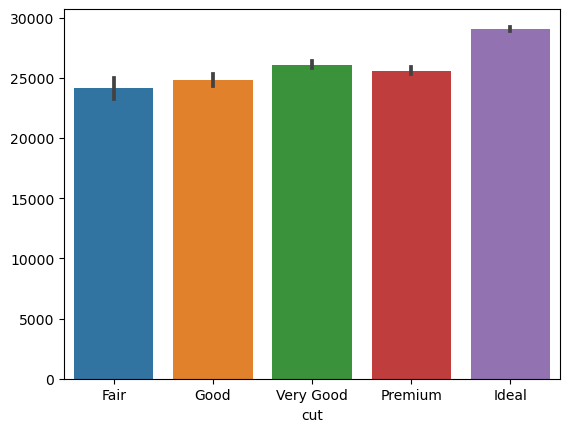

In [13]:
sns.barplot(x = "cut", y = df.cut.index, data = df)

In [14]:
#crossovers

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


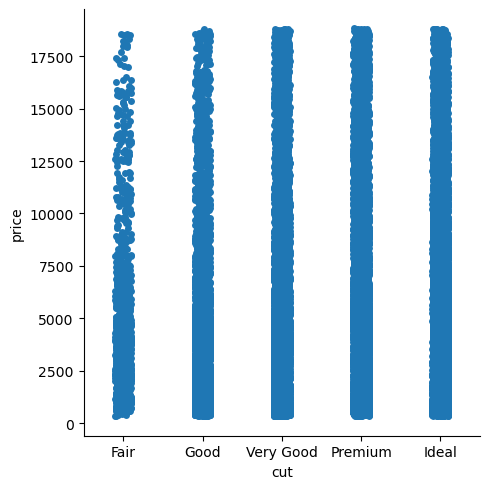

In [17]:
sns.catplot(x = "cut", y = "price", data=df);

<AxesSubplot:xlabel='cut', ylabel='price'>

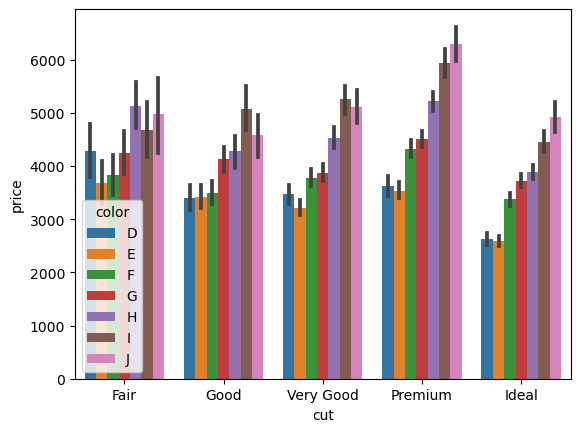

In [18]:
sns.barplot(x = "cut", y = "price", hue = "color", data=df) 

In [20]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## histogram and density graph

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\eray\AppData\Local\Temp\ipykernel_8488\4033869979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, kde=False);


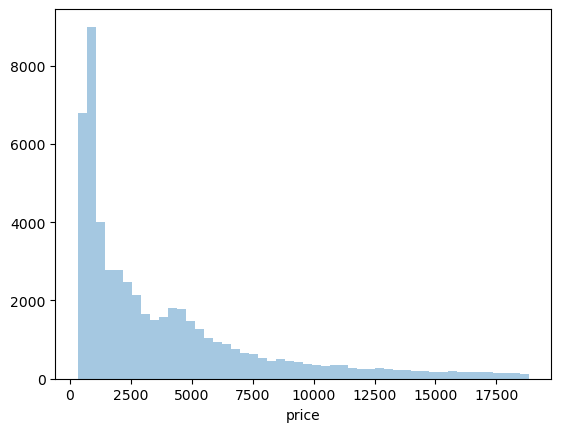

In [24]:
sns.distplot(df.price, kde=False);

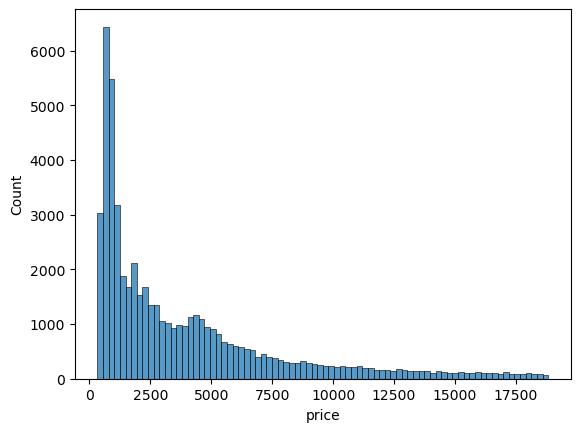

In [25]:
sns.histplot(df.price, kde=False);

In [28]:
?sns.distplot

<AxesSubplot:xlabel='price', ylabel='Count'>

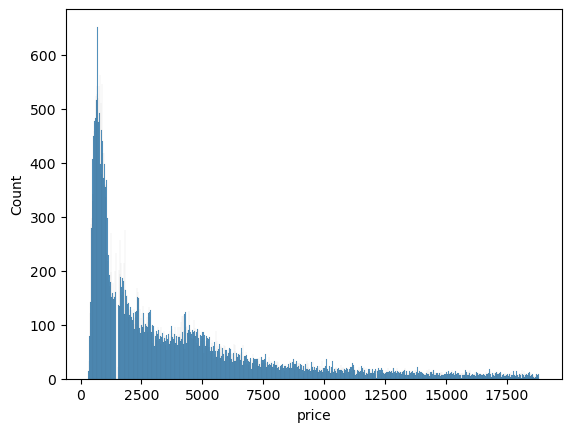

In [32]:
sns.histplot(df.price, bins=1000, kde=False)

C:\Users\eray\AppData\Local\Temp\ipykernel_8488\2239777731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


<AxesSubplot:xlabel='price', ylabel='Density'>

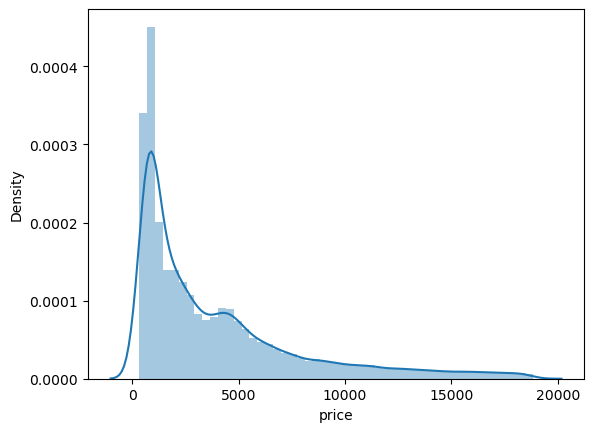

In [36]:
sns.distplot(df.price)

C:\Users\eray\AppData\Local\Temp\ipykernel_8488\3330739498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, hist=False)


<AxesSubplot:xlabel='price', ylabel='Density'>

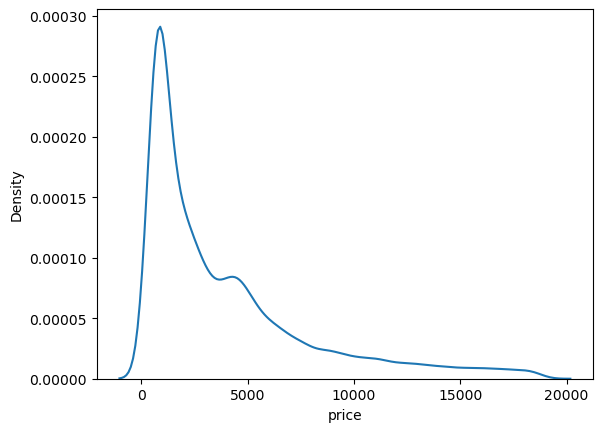

In [44]:
sns.distplot(df.price, hist=False)

In [38]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

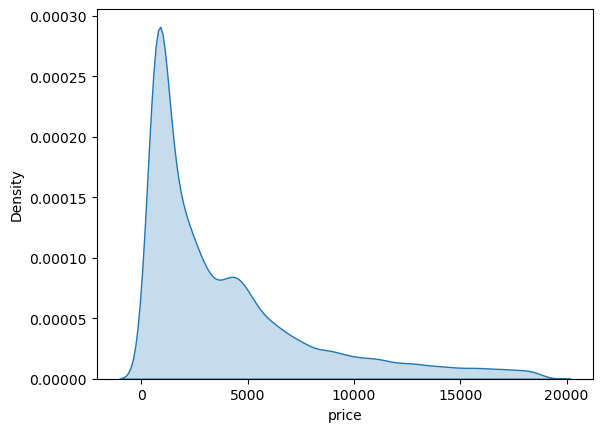

In [40]:
sns.kdeplot(df.price, fill = True)

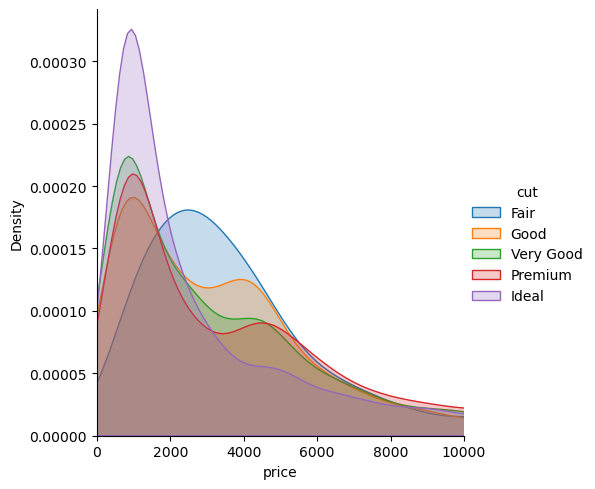

In [47]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height=5,
              xlim=(0, 10000))
 .map(sns.kdeplot, "price", fill=True)
 .add_legend()
);

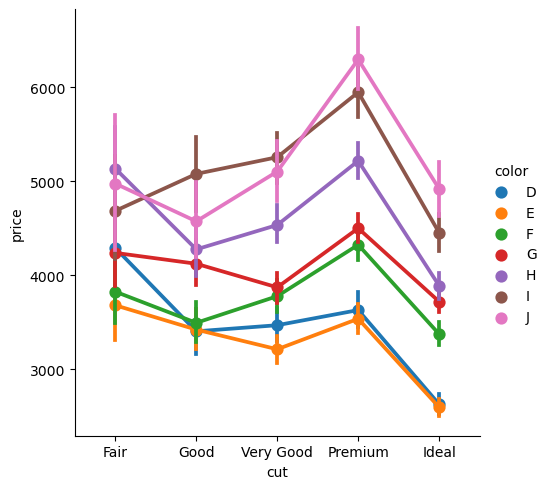

In [48]:
sns.catplot(x = "cut", y = "price" ,hue = "color", kind="point", data=df)
# We can see that different values are carried